In [1]:
import pandas as pd
import json
import os
import re

In [2]:
pickle_files = [
    "./data/Sonnet.pkl",
    "./data/sonnet-3.5.pkl",
    "./data/gpt-4o.pkl",
    "./data/gemini-1.5-pro.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df = pd.concat(dfs)

df

,image_name,depth,center,initial_size,reduction_factor,line_thickness,padding,model_output_raw,extracted_number,is_correct,Model
0,nested_squares_depth_2_image_1_thickness_2.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,2,0.75,The image contains 2 squares. There is one out...,2,True,Sonnet
1,nested_squares_depth_2_image_1_thickness_3.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,3,0.75,The image contains 2 squares. There is an oute...,2,True,Sonnet
2,nested_squares_depth_2_image_1_thickness_4.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,4,0.75,"The image shows 2 squares, one larger square f...",2,True,Sonnet
3,nested_squares_depth_2_image_2_thickness_2.png,2,"[4.522003363881829, 1.575293928741691]",12.158126,0.75,2,0.75,The image consists of two squares - a larger s...,2,True,Sonnet
4,nested_squares_depth_2_image_2_thickness_3.png,2,"[4.522003363881829, 1.575293928741691]",12.158126,0.75,3,0.75,"In the provided image, I can count a total of ...",2,True,Sonnet
...,...,...,...,...,...,...,...,...,...,...,...
115,nested_squares_depth_5_image_9_thickness_3.png,5,"[4.67396043765117, -3.083874562085932]",10.089593,0.75,3,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
116,nested_squares_depth_5_image_9_thickness_4.png,5,"[4.67396043765117, -3.083874562085932]",10.089593,0.75,4,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
117,nested_squares_depth_5_image_10_thickness_2.png,5,"[1.960921482573098, 0.529244414005689]",8.411051,0.75,2,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
118,nested_squares_depth_5_image_10_thickness_3.png,5,"[1.960921482573098, 0.529244414005689]",8.411051,0.75,3,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro


In [37]:
df.Model.value_counts()

Model
Sonnet            120
Sonnet-3.5        120
gpt-4o            120
Gemini-1.5-Pro    120
Name: count, dtype: int64

In [10]:
accuracy_per_model_and_word = df.groupby(["Model"])["is_correct"].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

accuracy_per_model_and_word.reset_index()

,Model,is_correct
0,Gemini-1.5-Pro,80.00
1,Sonnet,55.00
2,Sonnet-3.5,87.50
3,gpt-4o,48.33


In [4]:
accuracy_per_model_and_depth = df.groupby(["Model", "depth"])["is_correct"].mean()

# Convert the accuracy to percentage
accuracy_per_model_and_depth = accuracy_per_model_and_depth * 100
# Round to 2 decimal places
accuracy_per_model_and_depth = accuracy_per_model_and_depth.round(2)

print(accuracy_per_model_and_depth)

Model           depth
Gemini-1.5-Pro  2        100.00
                3        100.00
                4         20.00
                5        100.00
Sonnet          2         80.00
                3         23.33
                4         63.33
                5         53.33
Sonnet-3.5      2        100.00
                3        100.00
                4        100.00
                5         50.00
gpt-4o          2         76.67
                3         40.00
                4         20.00
                5         56.67
Name: is_correct, dtype: float64


In [5]:
print(accuracy_per_model_and_depth.to_latex())

\begin{tabular}{llr}
\toprule
 &  & is_correct \\
Model & depth &  \\
\midrule
\multirow[t]{4}{*}{Gemini-1.5-Pro} & 2 & 100.000000 \\
 & 3 & 100.000000 \\
 & 4 & 20.000000 \\
 & 5 & 100.000000 \\
\cline{1-3}
\multirow[t]{4}{*}{Sonnet} & 2 & 80.000000 \\
 & 3 & 23.330000 \\
 & 4 & 63.330000 \\
 & 5 & 53.330000 \\
\cline{1-3}
\multirow[t]{4}{*}{Sonnet-3.5} & 2 & 100.000000 \\
 & 3 & 100.000000 \\
 & 4 & 100.000000 \\
 & 5 & 50.000000 \\
\cline{1-3}
\multirow[t]{4}{*}{gpt-4o} & 2 & 76.670000 \\
 & 3 & 40.000000 \\
 & 4 & 20.000000 \\
 & 5 & 56.670000 \\
\cline{1-3}
\bottomrule
\end{tabular}



In [8]:
accuracy_per_model_and_depth = df.groupby(["Model", "line_thickness"])[
    "is_correct"
].mean()

# Convert the accuracy to percentage
accuracy_per_model_and_depth = accuracy_per_model_and_depth * 100
# Round to 2 decimal places
accuracy_per_model_and_depth = accuracy_per_model_and_depth.round(2)

accuracy_per_model_and_depth

Model           line_thickness
Gemini-1.5-Pro  2                 80.0
                3                 80.0
                4                 80.0
Sonnet          2                 42.5
                3                 60.0
                4                 62.5
Sonnet-3.5      2                 87.5
                3                 87.5
                4                 87.5
gpt-4o          2                 52.5
                3                 45.0
                4                 47.5
Name: is_correct, dtype: float64

In [7]:
accuracy_per_model_and_depth.reset_index()

,Model,line_thickness,is_correct
0,Gemini-1.5-Pro,2,80.0
1,Gemini-1.5-Pro,3,80.0
2,Gemini-1.5-Pro,4,80.0
3,Sonnet,2,42.5
4,Sonnet,3,60.0
5,Sonnet,4,62.5
6,Sonnet-3.5,2,87.5
7,Sonnet-3.5,3,87.5
8,Sonnet-3.5,4,87.5
9,gpt-4o,2,52.5


## Qualitative Analysis

In [ ]:
df

In [4]:
# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1)

        # Display the samples
        display(sample_correct[["image_name", "model_output_raw"]])
        display(sample_incorrect[["image_name", "model_output_raw"]])


# Call the function
display_model_outputs(df)

Model: Sonnet


,image_name,model_output_raw
85,nested_squares_depth_4_image_9_thickness_3.png,The image contains a series of concentric squa...
106,nested_squares_depth_5_image_6_thickness_3.png,The image contains a series of concentric squa...
86,nested_squares_depth_4_image_9_thickness_4.png,The image consists of 4 concentric square shap...
2,nested_squares_depth_2_image_1_thickness_4.png,"The image shows 2 squares, one larger square f..."


,image_name,model_output_raw
66,nested_squares_depth_4_image_3_thickness_2.png,The image consists of 9 square shapes nested w...
15,nested_squares_depth_2_image_6_thickness_2.png,The image contains 3 squares - one outer squar...
98,nested_squares_depth_5_image_3_thickness_4.png,The image contains a series of concentric blac...
68,nested_squares_depth_4_image_3_thickness_4.png,The image contains 9 squares or square outline...


Model: Sonnet-3.5


,image_name,model_output_raw
65,nested_squares_depth_4_image_2_thickness_4.png,The image contains a total of 4 squares:\n\n1....
35,nested_squares_depth_3_image_2_thickness_4.png,The image contains a total of 3 squares.\n\nTh...
42,nested_squares_depth_3_image_5_thickness_2.png,The image contains a total of 3 squares.\n\nTh...
95,nested_squares_depth_5_image_2_thickness_4.png,The image contains a total of 5 concentric squ...


,image_name,model_output_raw
97,nested_squares_depth_5_image_3_thickness_3.png,The image contains a total of 4 squares. There...
106,nested_squares_depth_5_image_6_thickness_3.png,The image contains a total of 4 squares. There...
105,nested_squares_depth_5_image_6_thickness_2.png,The image contains a total of 4 squares. These...
96,nested_squares_depth_5_image_3_thickness_2.png,The image contains a total of 4 squares. There...


Model: gpt-4o


,image_name,model_output_raw
101,nested_squares_depth_5_image_4_thickness_4.png,There are a total of 5 squares in the image.
4,nested_squares_depth_2_image_2_thickness_3.png,The image contains 2 squares; one small square...
66,nested_squares_depth_4_image_3_thickness_2.png,The image consists of 4 nested squares. Theref...
97,nested_squares_depth_5_image_3_thickness_3.png,"The image contains 5 squares, each one nested ..."


,image_name,model_output_raw
56,nested_squares_depth_3_image_9_thickness_4.png,There are four squares in the image. They are ...
100,nested_squares_depth_5_image_4_thickness_3.png,The image contains a total of five squares. Th...
75,nested_squares_depth_4_image_6_thickness_2.png,The image contains a series of nested squares....
59,nested_squares_depth_3_image_10_thickness_4.png,The image contains a set of nested squares. \n...


Model: Gemini-1.5-Pro


,image_name,model_output_raw
40,nested_squares_depth_3_image_4_thickness_3.png,There are **3** squares in the image. \n
31,nested_squares_depth_3_image_1_thickness_3.png,There are **3** squares in the image. \n
46,nested_squares_depth_3_image_6_thickness_3.png,There are **3** squares in the image. \n
59,nested_squares_depth_3_image_10_thickness_4.png,There are **3** squares in the image. \n


,image_name,model_output_raw
75,nested_squares_depth_4_image_6_thickness_2.png,There are **5** squares in the image. \n
80,nested_squares_depth_4_image_7_thickness_4.png,There are **5** squares in the image. \n
64,nested_squares_depth_4_image_2_thickness_3.png,There are **5** squares in the image. \n
76,nested_squares_depth_4_image_6_thickness_3.png,There are **5** squares in the image. \n


Model: Sonnet


/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_60388/1184076232.py:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


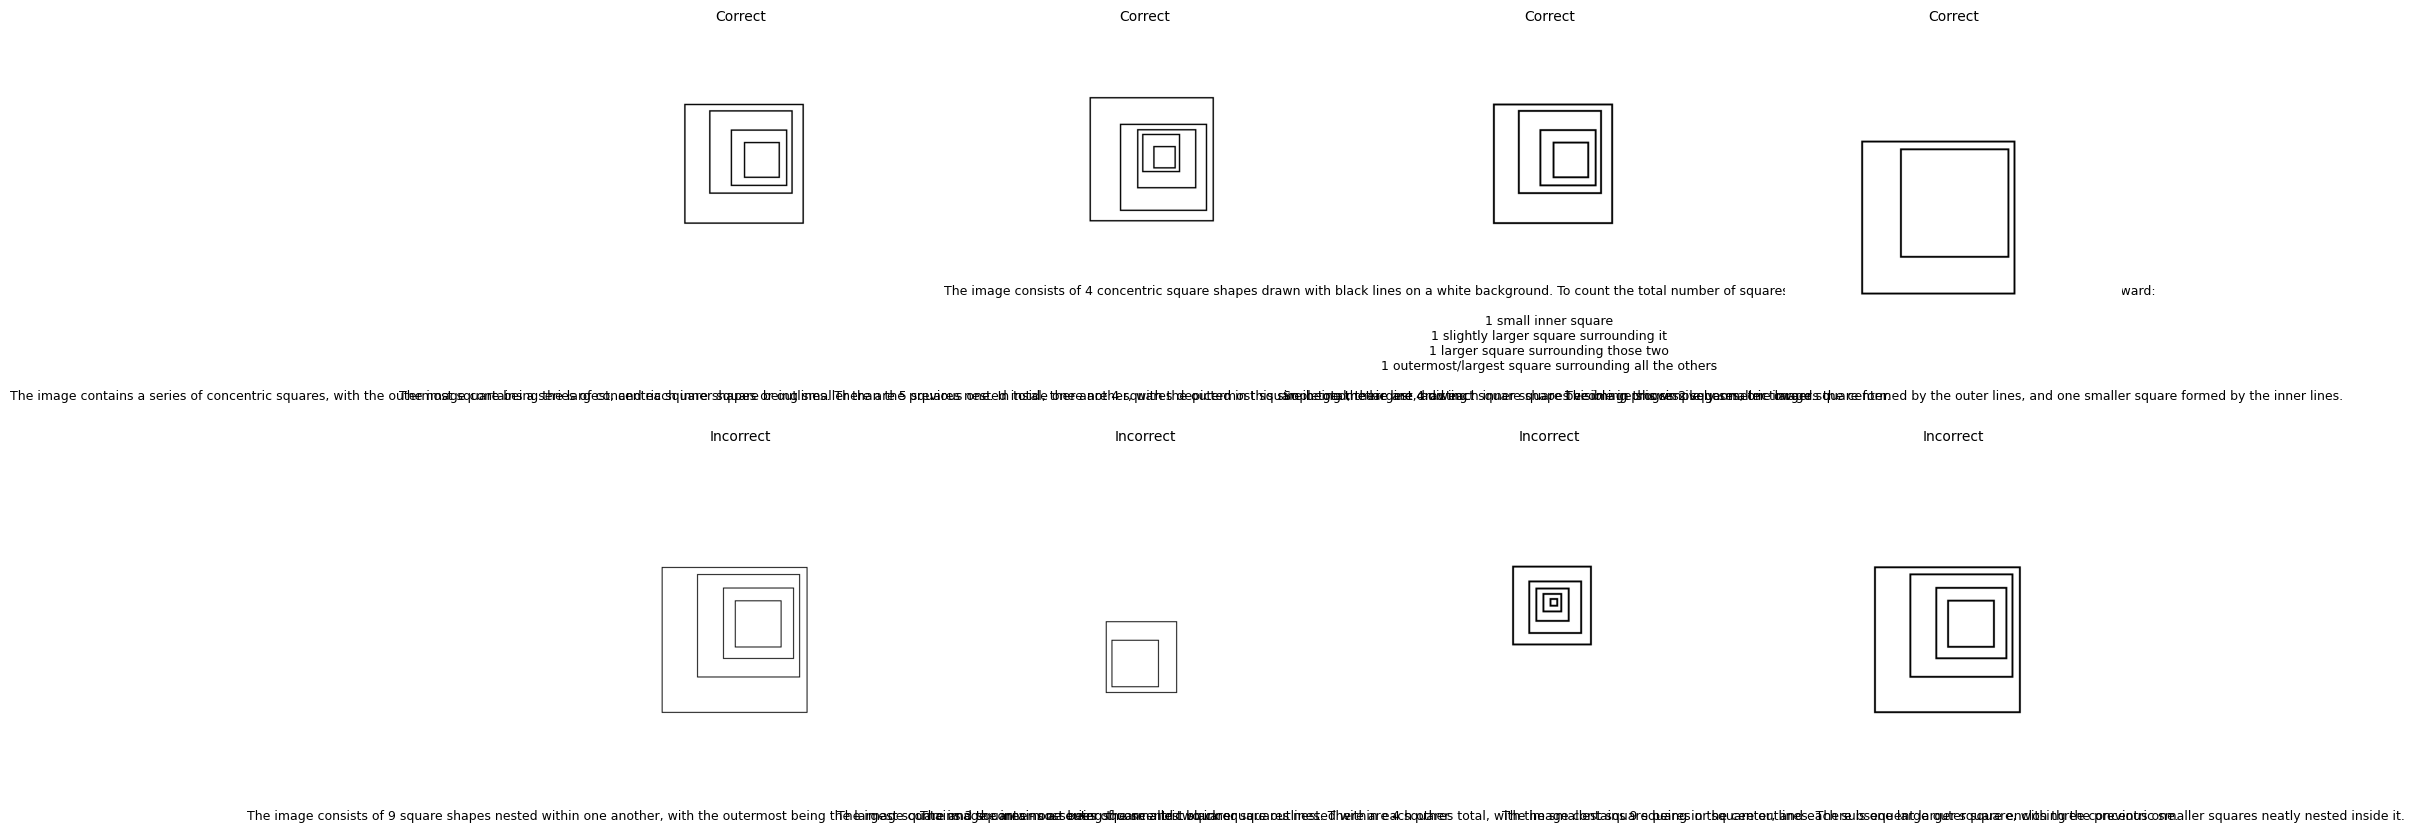

Model: Sonnet-3.5


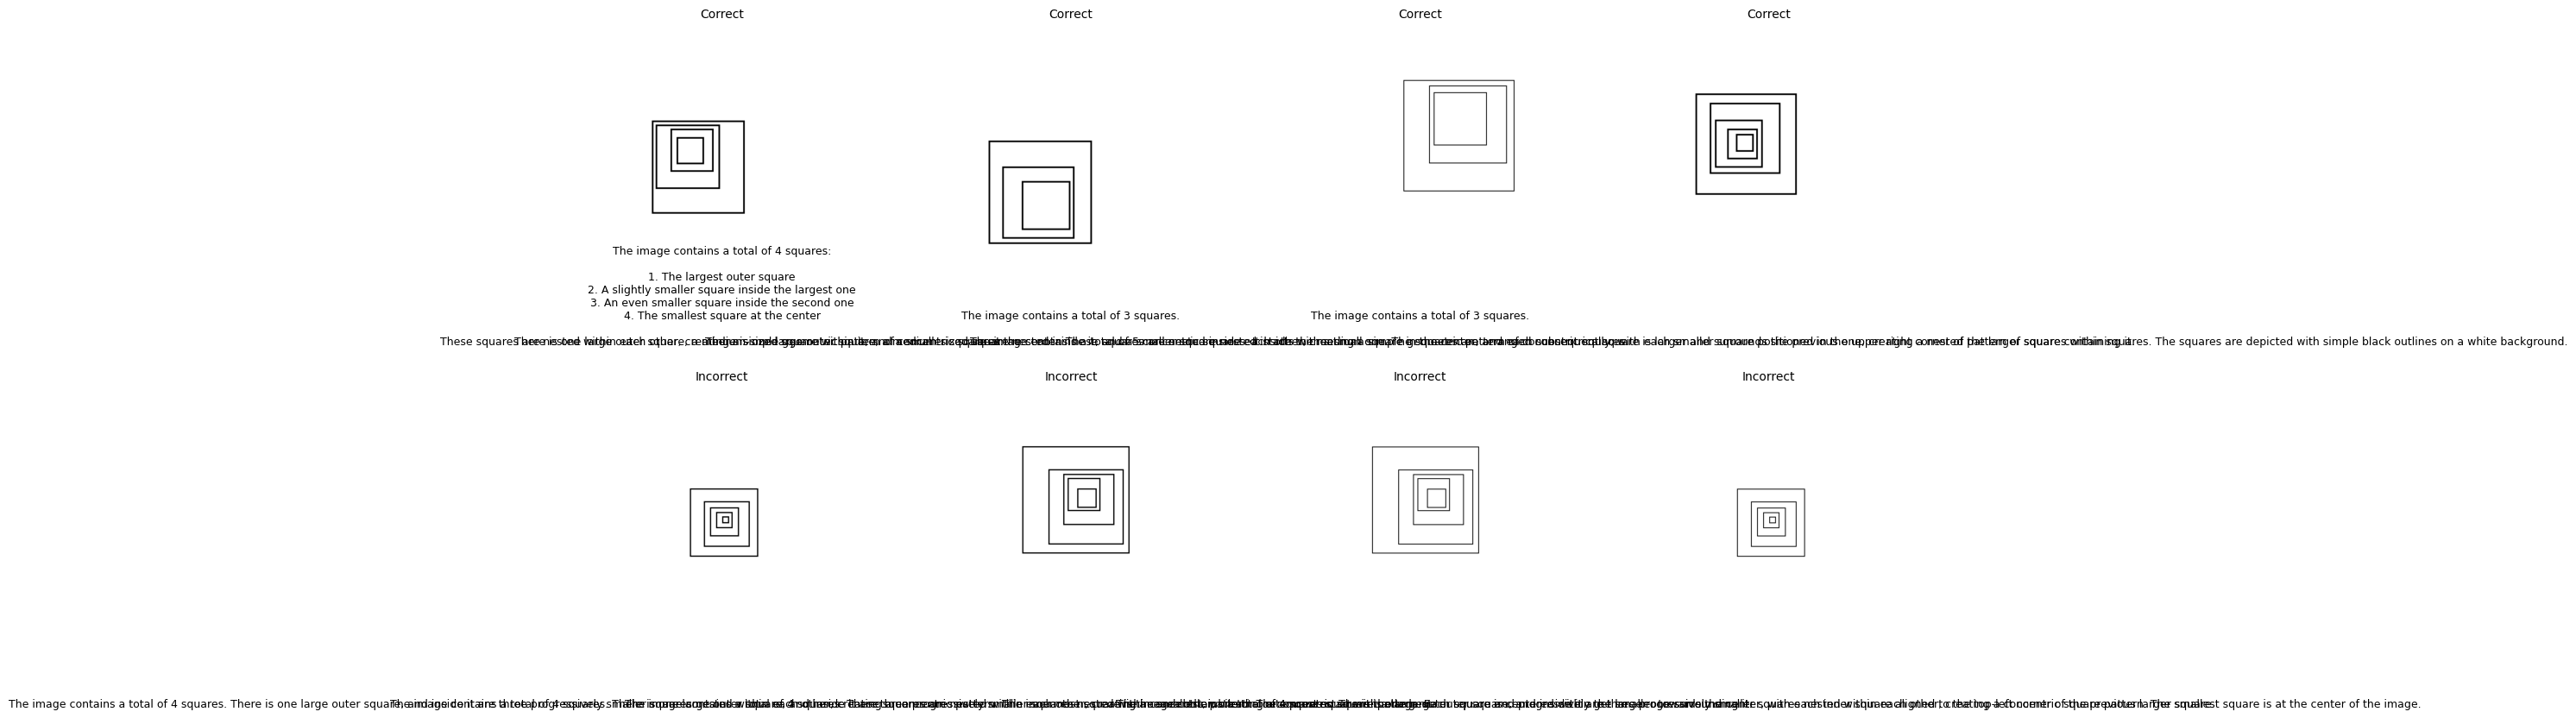

Model: gpt-4o


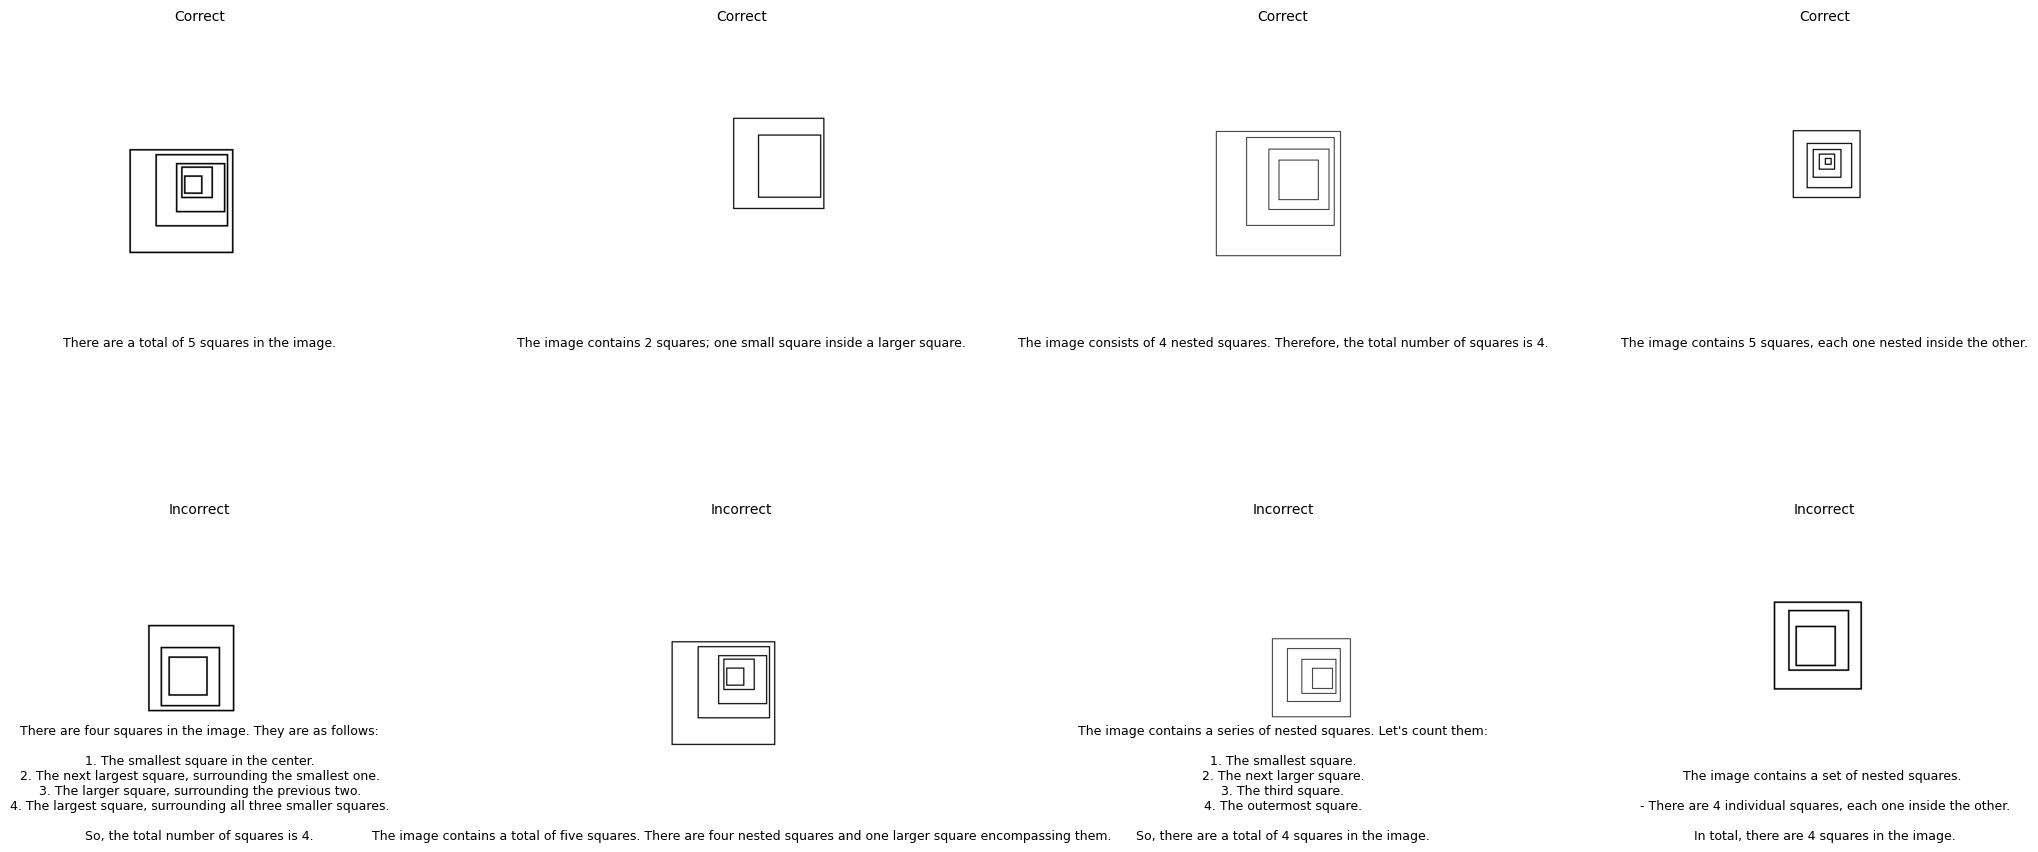

Model: Gemini-1.5-Pro


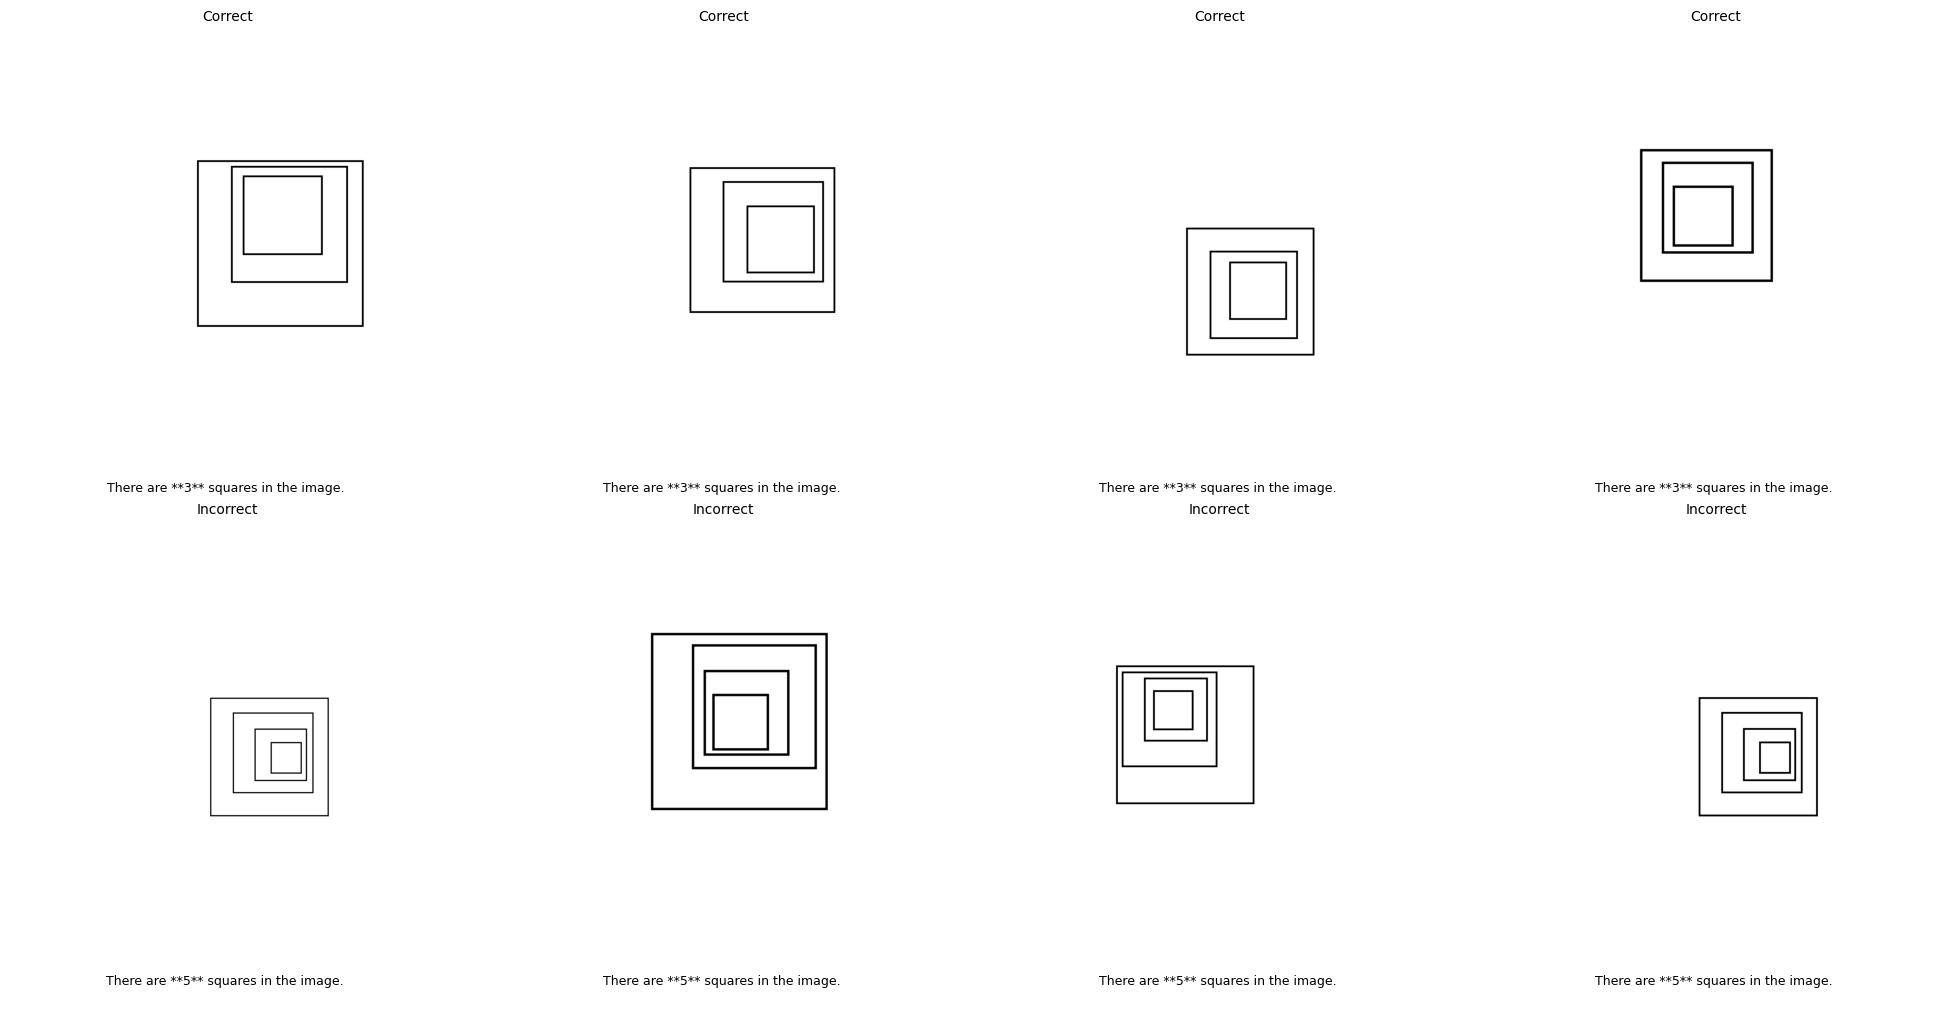

In [5]:
import matplotlib.pyplot as plt
from PIL import Image


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./images/{row['image_name']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            ax.set_title(
                f"{'Correct' if row['is_correct'] else 'Incorrect'}", fontsize=10
            )
            ax.text(
                0.5,
                -0.1,
                row["model_output_raw"],
                fontsize=9,
                ha="center",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

Model: Sonnet


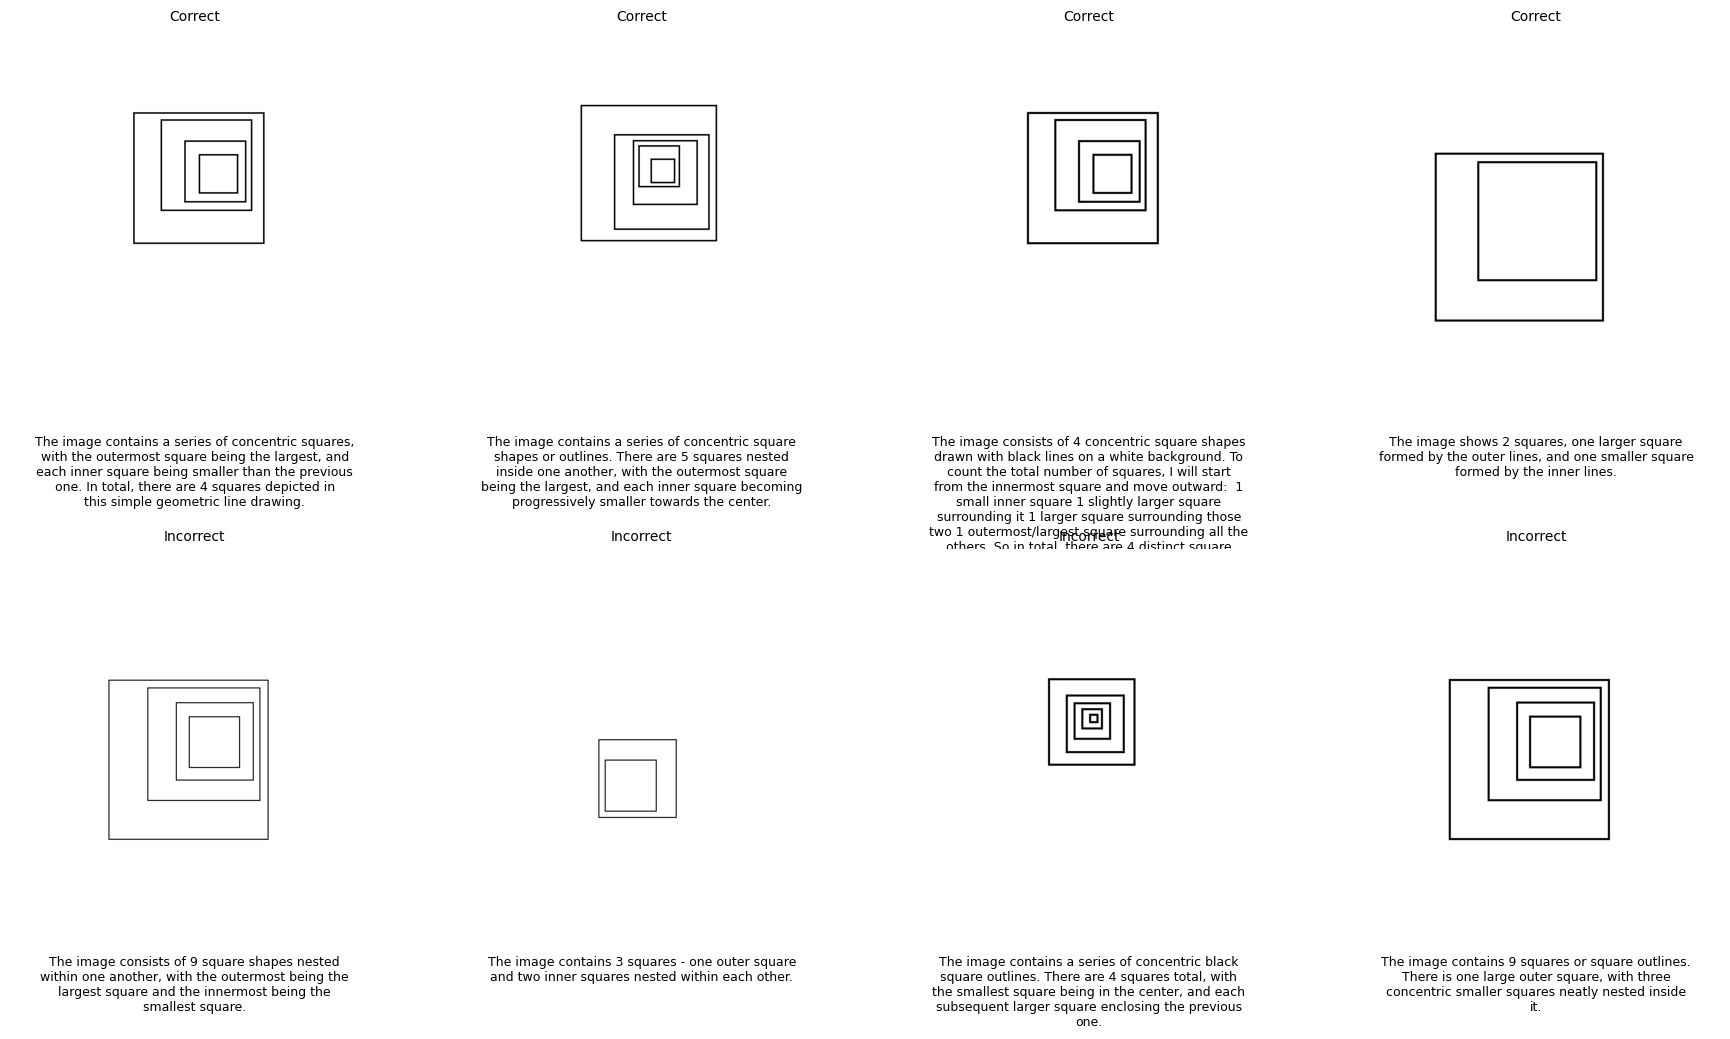

Model: Sonnet-3.5


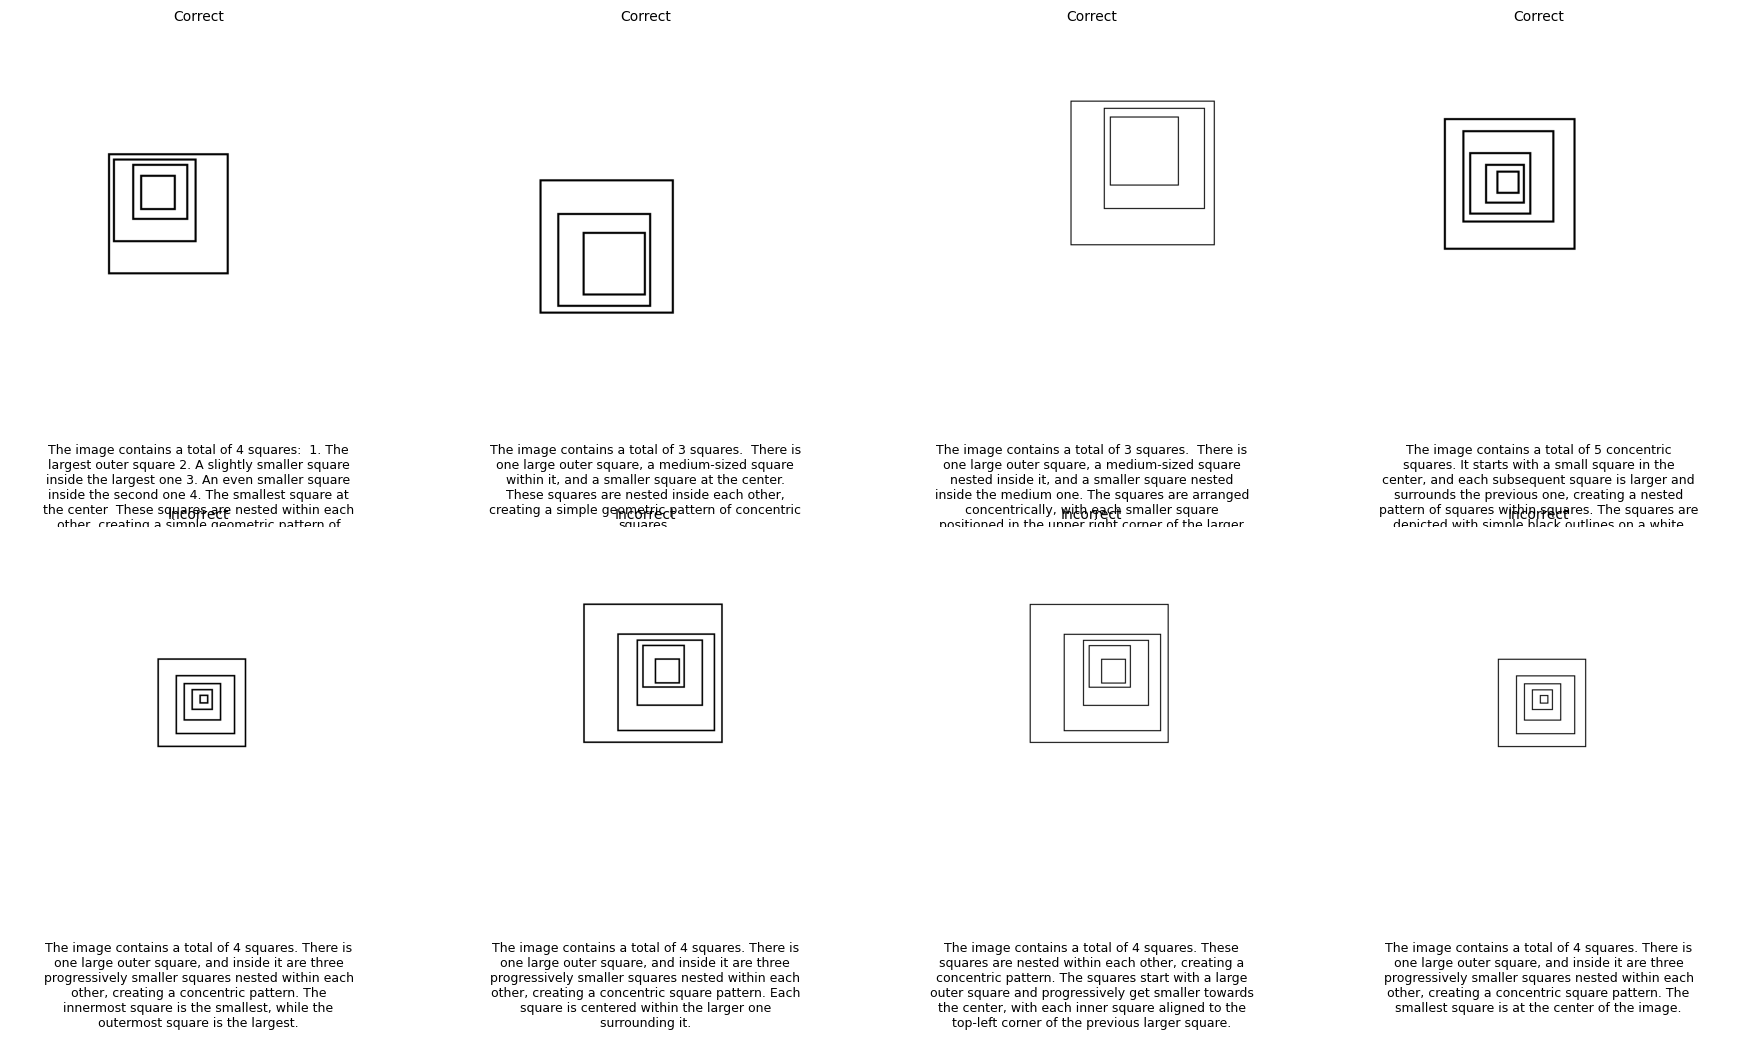

Model: gpt-4o


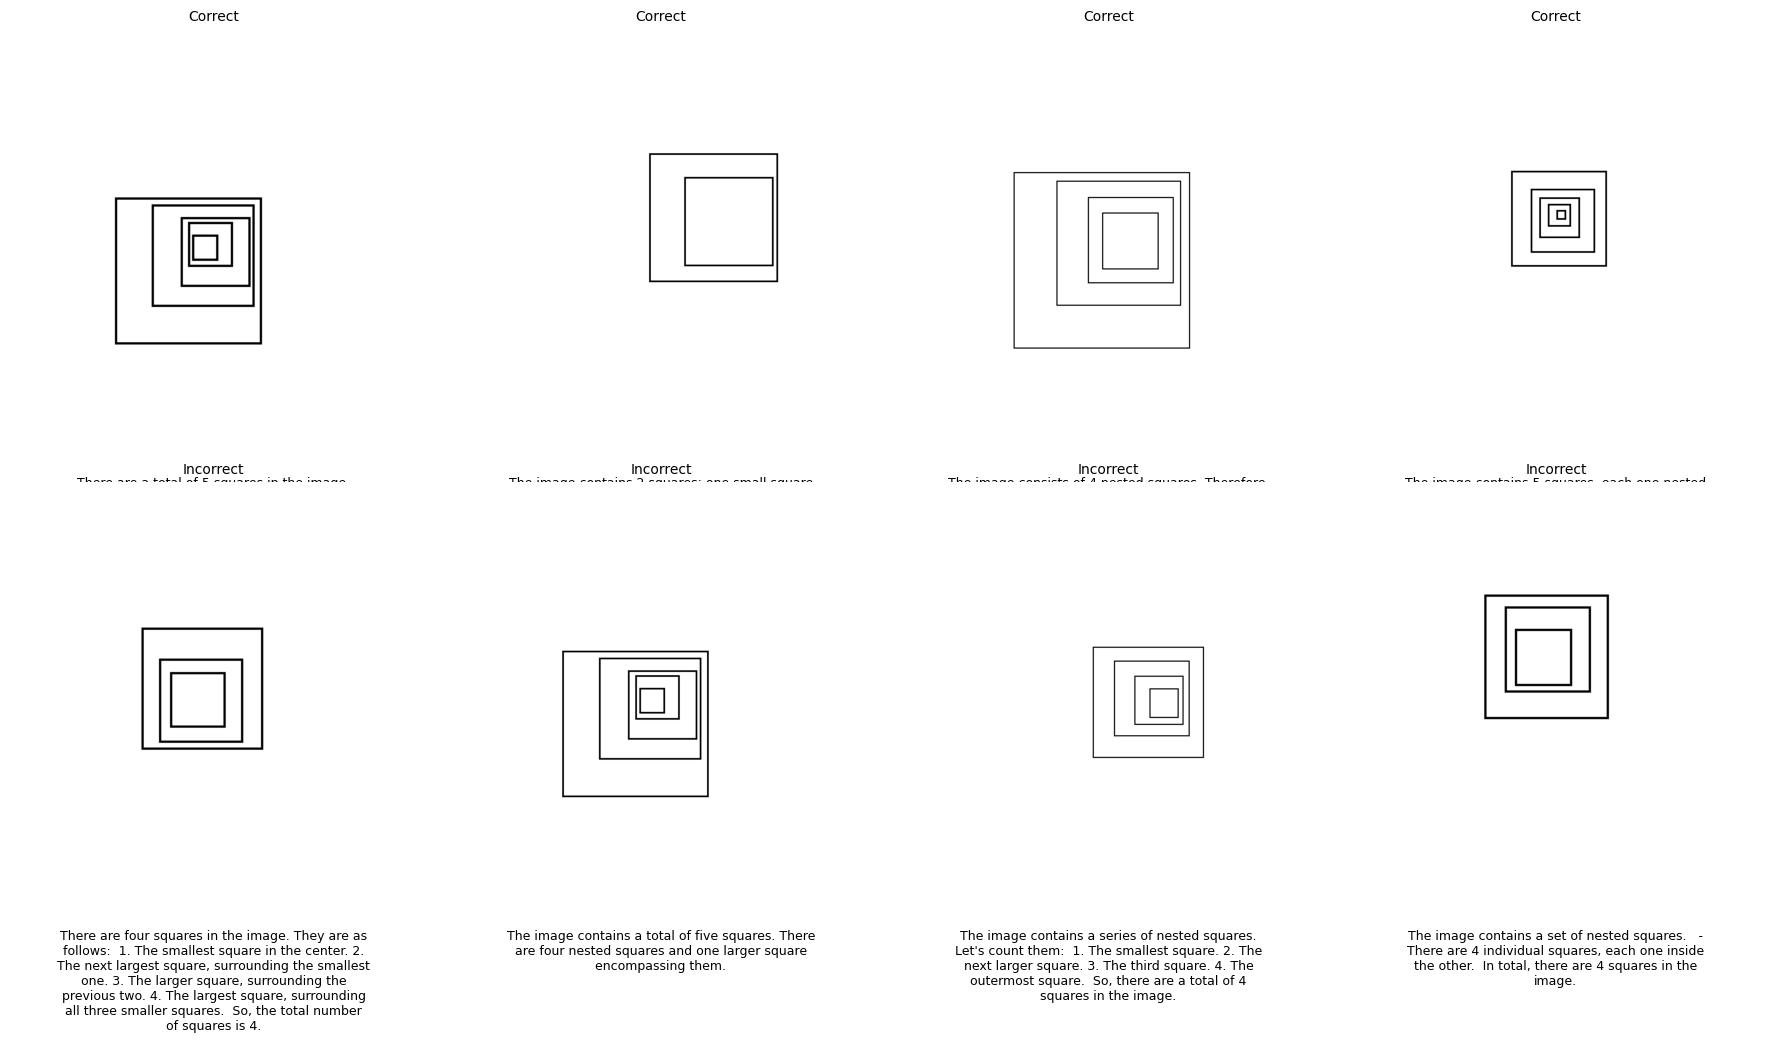

Model: Gemini-1.5-Pro


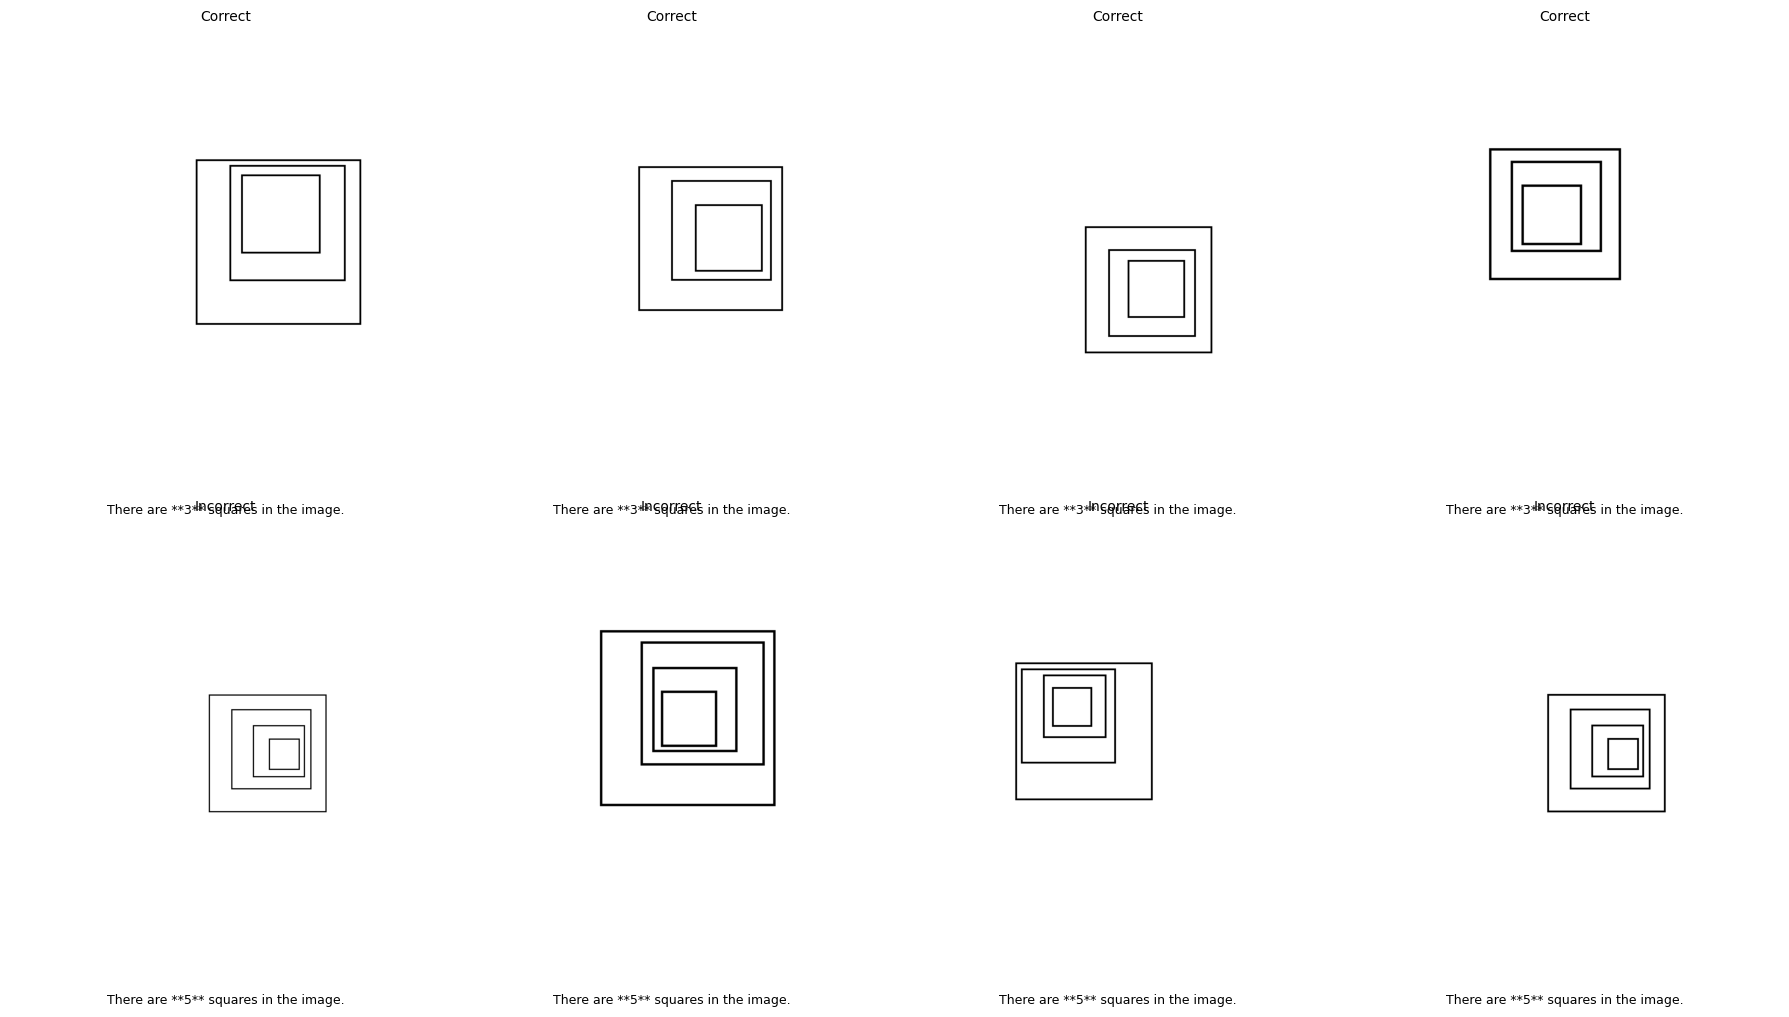

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        fig, axs = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./images/{row['image_name']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            ax.set_title(
                f"{'Correct' if row['is_correct'] else 'Incorrect'}", fontsize=10
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model_output_raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

Model: Sonnet


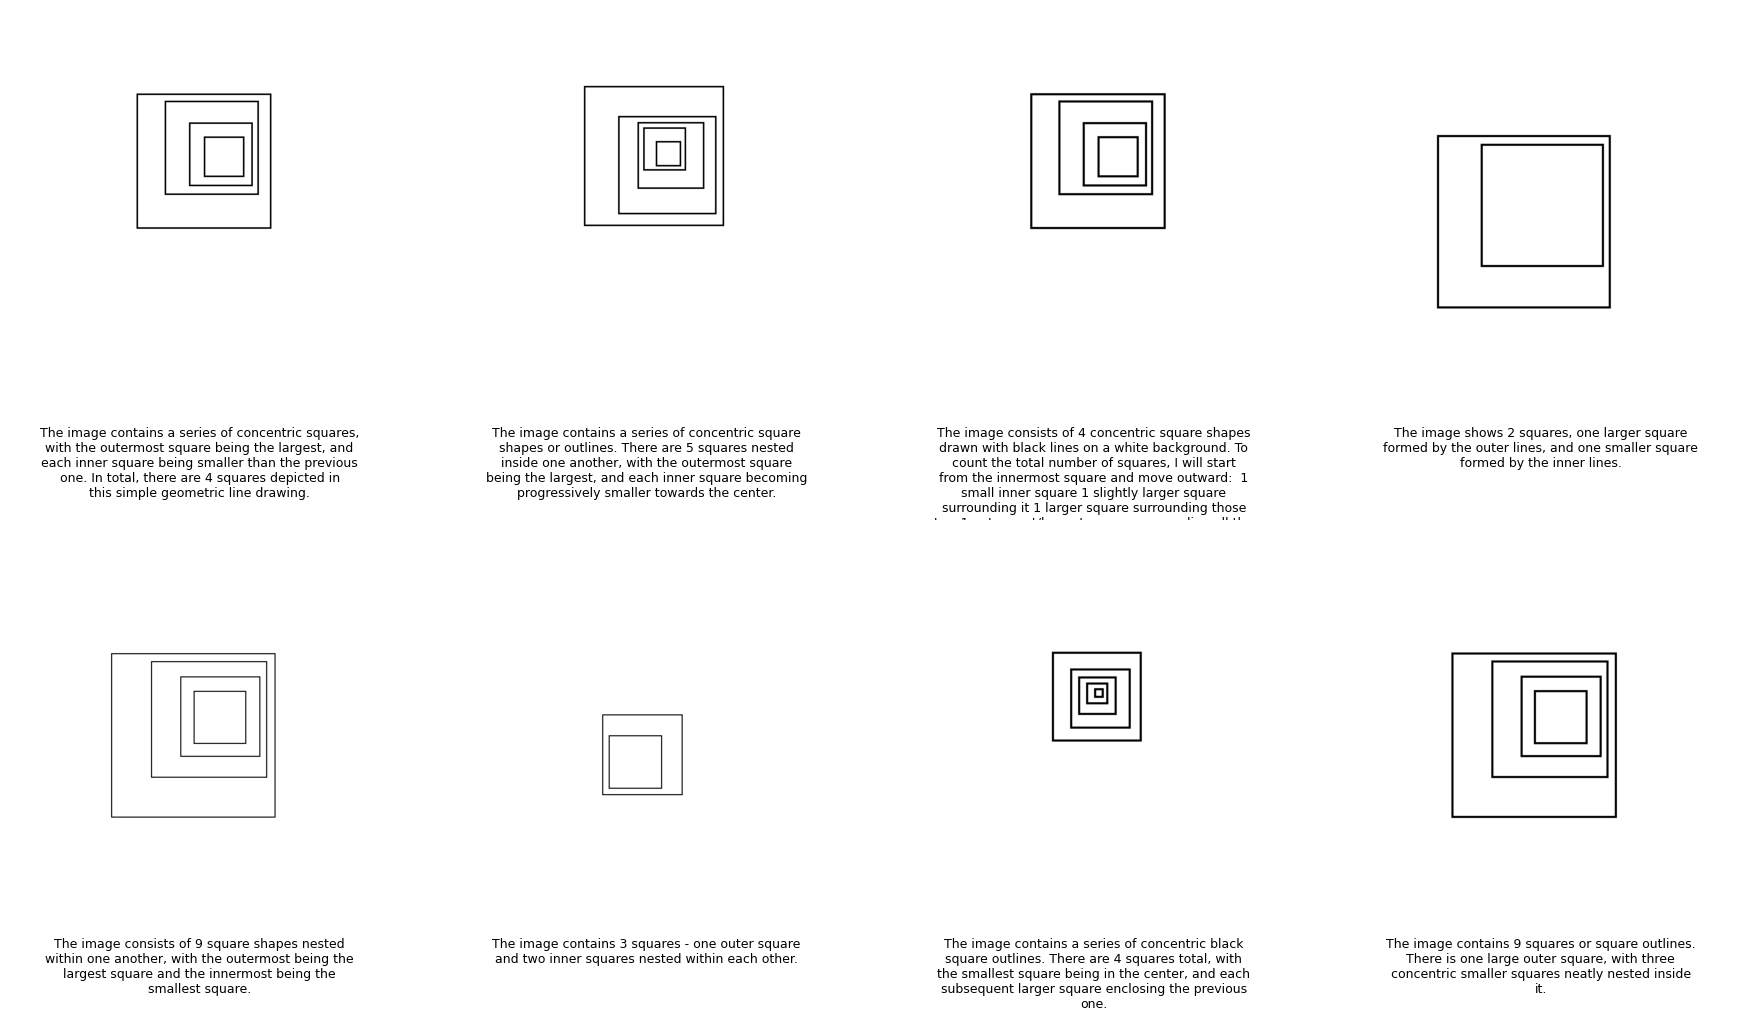

Model: Sonnet-3.5


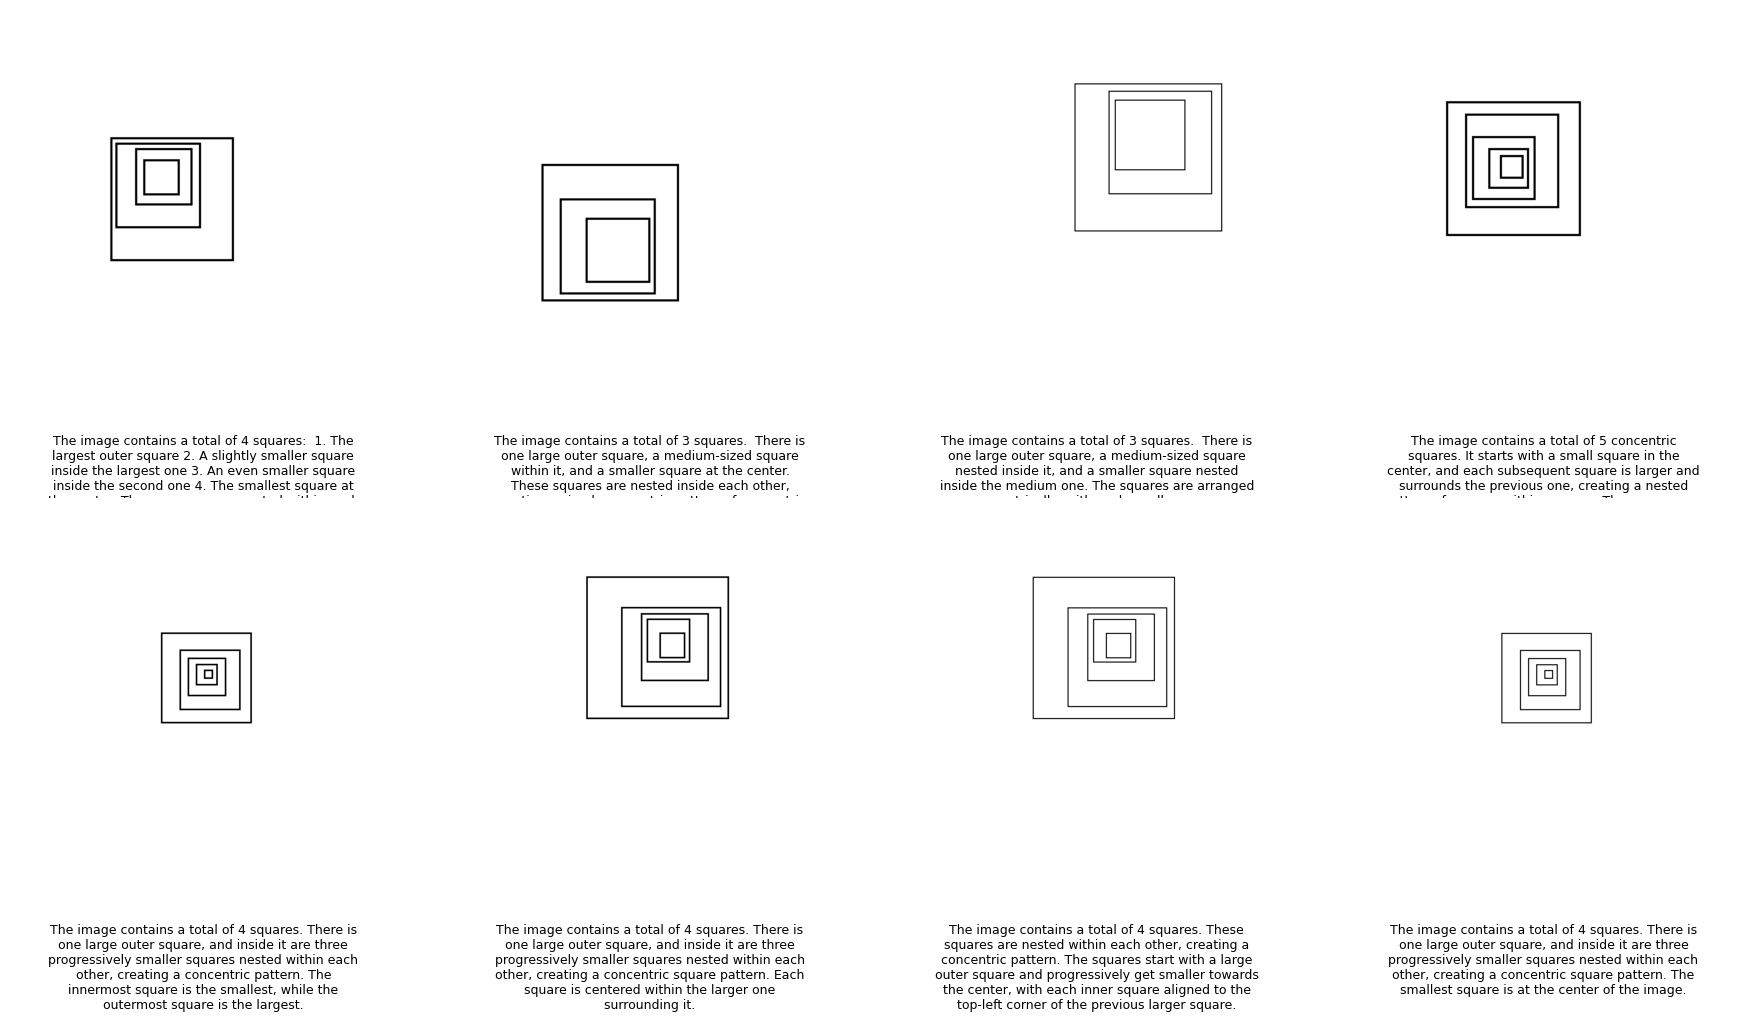

Model: gpt-4o


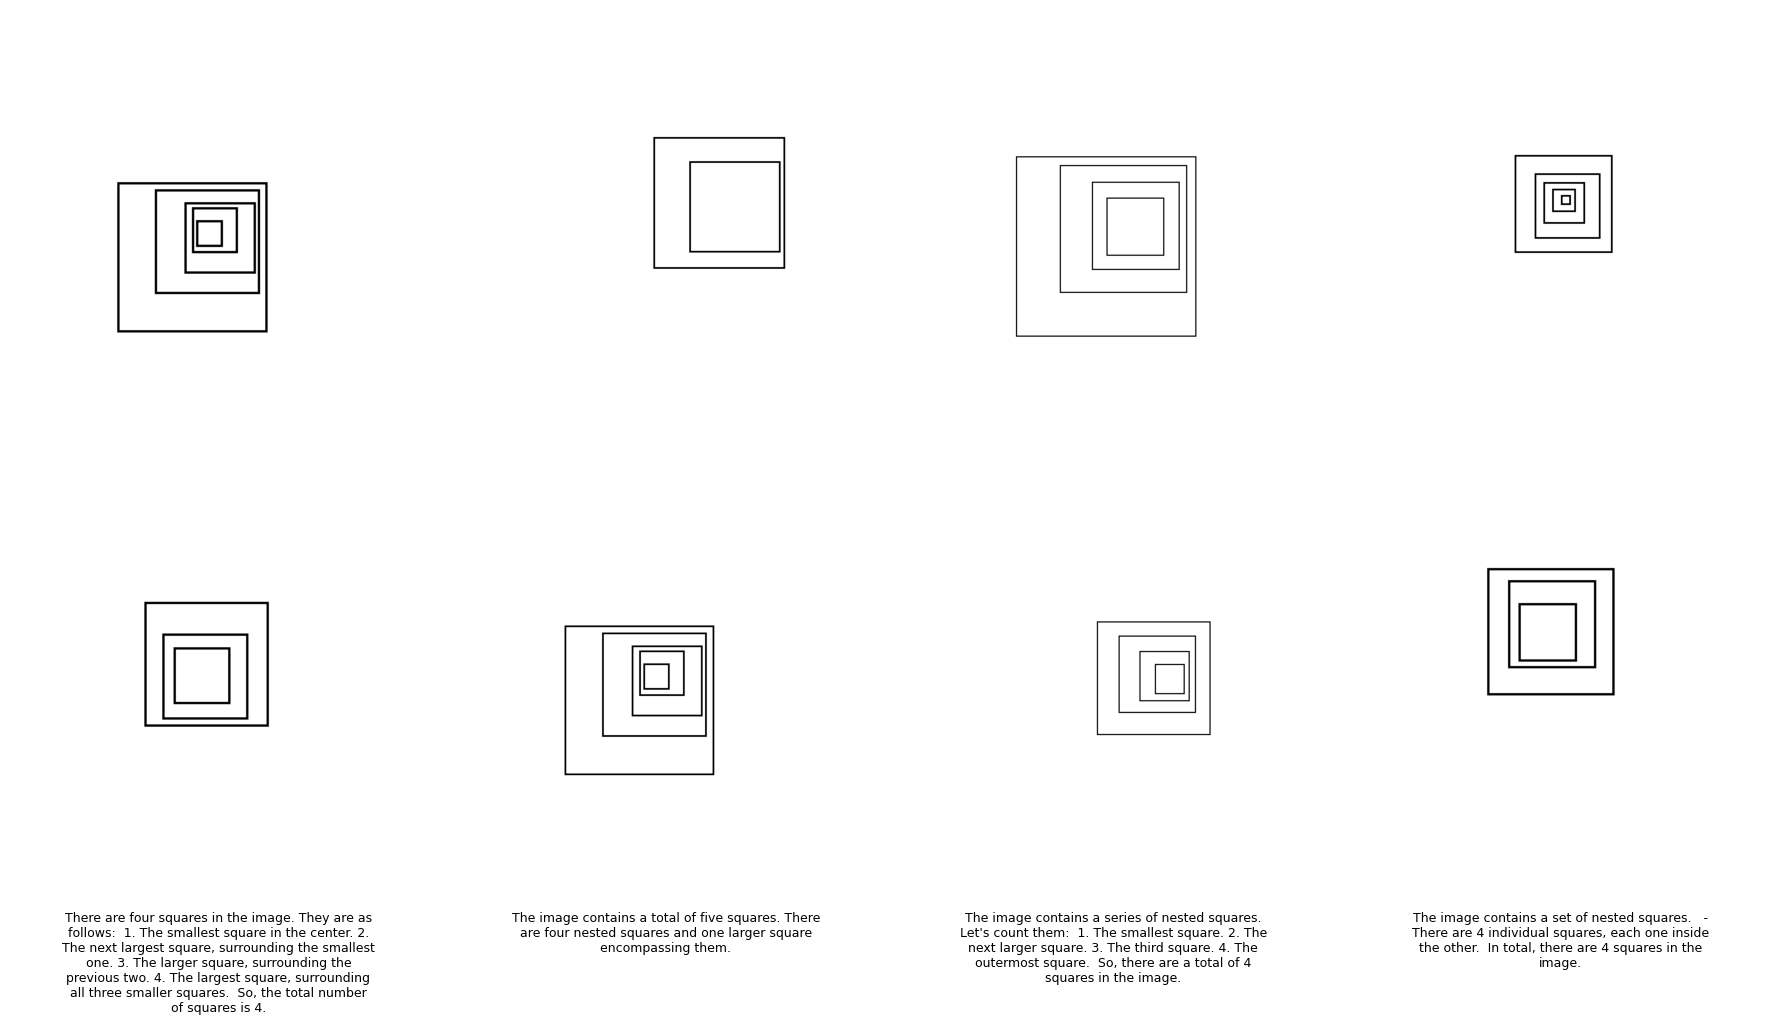

Model: Gemini-1.5-Pro


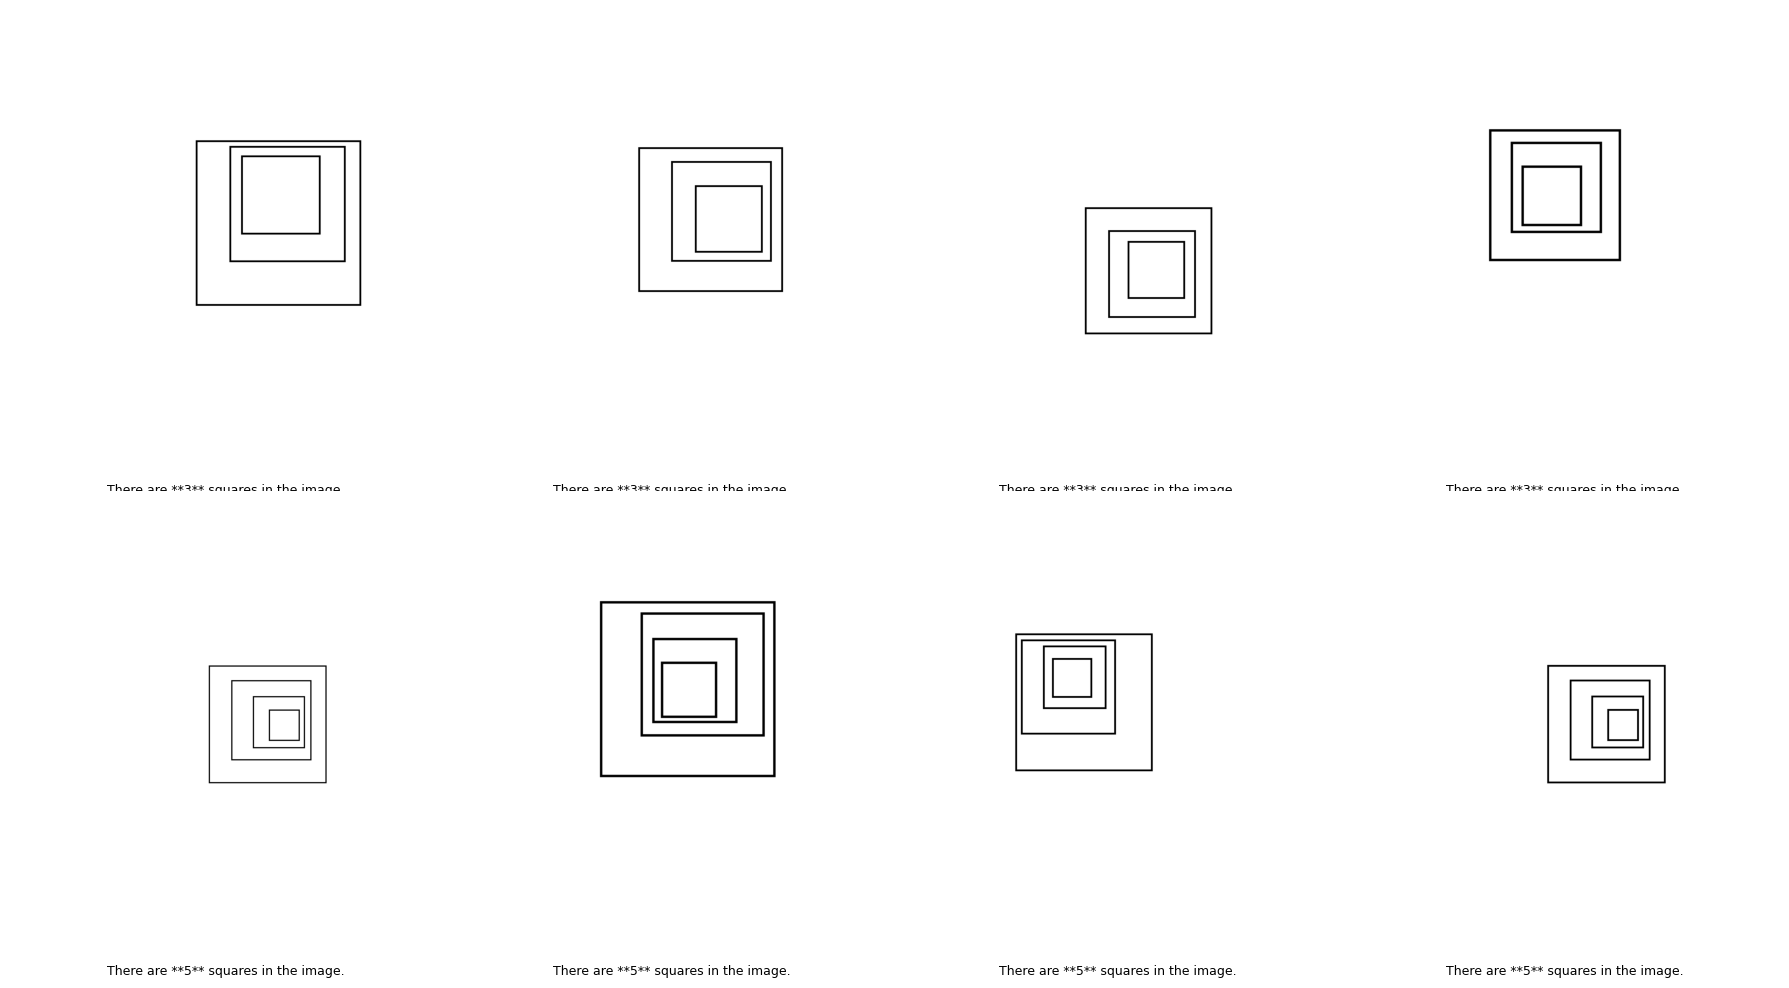

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        fig, axs = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./images/{row['image_name']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            # ax.set_title(
            #     f"{'Correct' if row['is_correct'] else 'Incorrect'}", fontsize=10
            # )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model_output_raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

In [10]:
df

,image_name,depth,center,initial_size,reduction_factor,line_thickness,padding,model_output_raw,extracted_number,is_correct,Model
0,nested_squares_depth_2_image_1_thickness_2.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,2,0.75,The image contains 2 squares. There is one out...,2,True,Sonnet
1,nested_squares_depth_2_image_1_thickness_3.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,3,0.75,The image contains 2 squares. There is an oute...,2,True,Sonnet
2,nested_squares_depth_2_image_1_thickness_4.png,2,"[-2.2395532434656262, -2.245365217594155]",17.574157,0.75,4,0.75,"The image shows 2 squares, one larger square f...",2,True,Sonnet
3,nested_squares_depth_2_image_2_thickness_2.png,2,"[4.522003363881829, 1.575293928741691]",12.158126,0.75,2,0.75,The image consists of two squares - a larger s...,2,True,Sonnet
4,nested_squares_depth_2_image_2_thickness_3.png,2,"[4.522003363881829, 1.575293928741691]",12.158126,0.75,3,0.75,"In the provided image, I can count a total of ...",2,True,Sonnet
...,...,...,...,...,...,...,...,...,...,...,...
115,nested_squares_depth_5_image_9_thickness_3.png,5,"[4.67396043765117, -3.083874562085932]",10.089593,0.75,3,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
116,nested_squares_depth_5_image_9_thickness_4.png,5,"[4.67396043765117, -3.083874562085932]",10.089593,0.75,4,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
117,nested_squares_depth_5_image_10_thickness_2.png,5,"[1.960921482573098, 0.529244414005689]",8.411051,0.75,2,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro
118,nested_squares_depth_5_image_10_thickness_3.png,5,"[1.960921482573098, 0.529244414005689]",8.411051,0.75,3,0.75,There are **5** squares in the image. \n,5,True,Gemini-1.5-Pro


In [12]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import shutil


# Function to display and save samples of correct and incorrect predictions for each model
def display_and_save_model_outputs(df):
    models = df["Model"].unique()
    base_dir = "./qualitative"
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for model in models:
        model_dir = os.path.join(base_dir, model)
        correct_dir = os.path.join(model_dir, "correct")
        incorrect_dir = os.path.join(model_dir, "incorrect")

        # Create directories if they do not exist
        os.makedirs(correct_dir, exist_ok=True)
        os.makedirs(incorrect_dir, exist_ok=True)

        # Filter predictions
        correct_predictions = df[(df["Model"] == model) & (df["is_correct"] == True)]
        incorrect_predictions = df[(df["Model"] == model) & (df["is_correct"] == False)]

        # Sample 6 correct and 6 incorrect predictions
        sample_correct = correct_predictions.sample(6, random_state=1)
        sample_incorrect = incorrect_predictions.sample(6, random_state=1)

        # Save images with new naming convention
        for idx, row in sample_correct.iterrows():
            img_path = f"./images/{row['image_name']}"
            img_path = img_path.replace(".png", ".pdf")
            new_filename = f"gt_{row['depth']}_predicted_{row['extracted_number']}_{row['image_name']}"
            new_filename = new_filename.replace(".png", ".pdf")
            shutil.copy(img_path, os.path.join(correct_dir, new_filename))

        for idx, row in sample_incorrect.iterrows():
            img_path = f"./images/{row['image_name']}"
            img_path = img_path.replace(".png", ".pdf")
            new_filename = f"gt_{row['depth']}_predicted_{row['extracted_number']}_{row['image_name']}"
            new_filename = new_filename.replace(".png", ".pdf")
            shutil.copy(img_path, os.path.join(incorrect_dir, new_filename))


# Call the function
display_and_save_model_outputs(df)

In [13]:
import pandas as pd


# Function to find and display entries where all models failed
def display_failed_predictions(df):
    # Group by 'image_name' and filter where all 'is_correct' values are False
    failed_df = df.groupby("image_name").filter(lambda x: all(x["is_correct"] == False))

    # Check if there are any entries where all models failed
    if not failed_df.empty:
        print("Entries where all models failed:")
        display(failed_df)
    else:
        print("No entries found where all models failed.")


# Call the function
display_failed_predictions(df)

No entries found where all models failed.


In [15]:
import pandas as pd


# Function to find and display entries where at least two models failed
def display_at_least_two_failed_predictions(df):
    # Group by 'image_name' and filter where at least two 'is_correct' values are False
    failed_df = df.groupby("image_name").filter(
        lambda x: x["is_correct"].value_counts().get(False, 0) >= 3
    )

    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least two models failed:")
        display(failed_df)
    else:
        print("No entries found where at least two models failed.")


# Call the function
display_at_least_two_failed_predictions(df)

Entries where at least two models failed:


,image_name,depth,center,initial_size,reduction_factor,line_thickness,padding,model_output_raw,extracted_number,is_correct,Model
62,nested_squares_depth_4_image_1_thickness_4.png,4,"[2.339297927162307, 0.487007108229196]",13.610137,0.75,4,0.75,The image contains 5 squares of decreasing siz...,5,False,Sonnet
68,nested_squares_depth_4_image_3_thickness_4.png,4,"[-1.1849647004093, -2.506023415412208]",16.754685,0.75,4,0.75,The image contains 9 squares or square outline...,9,False,Sonnet
69,nested_squares_depth_4_image_4_thickness_2.png,4,"[-4.670296581949377, 2.8040014161931612]",12.938223,0.75,2,0.75,The image contains 5 squares - one large outer...,5,False,Sonnet
71,nested_squares_depth_4_image_4_thickness_4.png,4,"[-4.670296581949377, 2.8040014161931612]",12.938223,0.75,4,0.75,The image consists of a series of concentric b...,5,False,Sonnet
72,nested_squares_depth_4_image_5_thickness_2.png,4,"[0.9548219044595021, -4.67788661879044]",11.698594,0.75,2,0.75,The image contains 5 squares of descending siz...,5,False,Sonnet
80,nested_squares_depth_4_image_7_thickness_4.png,4,"[0.9373048544062371, 1.719152698237167]",15.638831,0.75,4,0.75,The image contains 5 squares - one large squar...,5,False,Sonnet
98,nested_squares_depth_5_image_3_thickness_4.png,5,"[-0.19576878885078303, 1.463757182376851]",8.980036,0.75,4,0.75,The image contains a series of concentric blac...,4,False,Sonnet
107,nested_squares_depth_5_image_6_thickness_4.png,5,"[0.23797062013257703, 4.4945656618126755]",14.233810,0.75,4,0.75,The image contains a series of concentric squa...,4,False,Sonnet
62,nested_squares_depth_4_image_1_thickness_4.png,4,"[2.339297927162307, 0.487007108229196]",13.610137,0.75,4,0.75,The image contains a total of 4 squares.\n\nTh...,4,True,Sonnet-3.5
68,nested_squares_depth_4_image_3_thickness_4.png,4,"[-1.1849647004093, -2.506023415412208]",16.754685,0.75,4,0.75,The image contains a total of 4 squares:\n\n1....,4,True,Sonnet-3.5


In [36]:
import os
import pandas as pd
from PIL import Image
import shutil


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df):
    # Group by 'image_name' and filter where at least two 'is_correct' values are False
    failed_df = df.groupby("image_name").filter(
        lambda x: x["is_correct"].value_counts().get(False, 0) >= 3
    )

    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="image_name", columns="Model", values="is_correct", aggfunc="first"
        )

        # Display the pivoted DataFrame
        display(pivoted_df)

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Sample 10 failed predictions
        sample_failed = failed_df.sample(min(10, len(failed_df)), random_state=1337)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("image_name"):
            details = [f"gt_{group.iloc[0]['depth']}"]  # Start with ground truth label
            for _, row in group.iterrows():
                details.append(f"{row['Model']}_{row['extracted_number']}")

            detailed_filename = "_".join(details) + "_" + image_name + ".pdf"
            img_path = f"./images/{image_name}".replace(".png", ".pdf")
            new_filename = detailed_filename.replace(".png", ".pdf")

            shutil.copy(img_path, os.path.join(base_dir, new_filename))

    else:
        print("No entries found where at least two models failed.")


# Call the function
save_failed_model_outputs(df)

Entries where at least three models failed:


,image_name,depth,center,initial_size,reduction_factor,line_thickness,padding,model_output_raw,extracted_number,is_correct,Model
62,nested_squares_depth_4_image_1_thickness_4.png,4,"[2.339297927162307, 0.487007108229196]",13.610137,0.75,4,0.75,The image contains 5 squares of decreasing siz...,5,False,Sonnet
68,nested_squares_depth_4_image_3_thickness_4.png,4,"[-1.1849647004093, -2.506023415412208]",16.754685,0.75,4,0.75,The image contains 9 squares or square outline...,9,False,Sonnet
69,nested_squares_depth_4_image_4_thickness_2.png,4,"[-4.670296581949377, 2.8040014161931612]",12.938223,0.75,2,0.75,The image contains 5 squares - one large outer...,5,False,Sonnet
71,nested_squares_depth_4_image_4_thickness_4.png,4,"[-4.670296581949377, 2.8040014161931612]",12.938223,0.75,4,0.75,The image consists of a series of concentric b...,5,False,Sonnet
72,nested_squares_depth_4_image_5_thickness_2.png,4,"[0.9548219044595021, -4.67788661879044]",11.698594,0.75,2,0.75,The image contains 5 squares of descending siz...,5,False,Sonnet
80,nested_squares_depth_4_image_7_thickness_4.png,4,"[0.9373048544062371, 1.719152698237167]",15.638831,0.75,4,0.75,The image contains 5 squares - one large squar...,5,False,Sonnet
98,nested_squares_depth_5_image_3_thickness_4.png,5,"[-0.19576878885078303, 1.463757182376851]",8.980036,0.75,4,0.75,The image contains a series of concentric blac...,4,False,Sonnet
107,nested_squares_depth_5_image_6_thickness_4.png,5,"[0.23797062013257703, 4.4945656618126755]",14.233810,0.75,4,0.75,The image contains a series of concentric squa...,4,False,Sonnet
62,nested_squares_depth_4_image_1_thickness_4.png,4,"[2.339297927162307, 0.487007108229196]",13.610137,0.75,4,0.75,The image contains a total of 4 squares.\n\nTh...,4,True,Sonnet-3.5
68,nested_squares_depth_4_image_3_thickness_4.png,4,"[-1.1849647004093, -2.506023415412208]",16.754685,0.75,4,0.75,The image contains a total of 4 squares:\n\n1....,4,True,Sonnet-3.5


Model,Gemini-1.5-Pro,Sonnet,Sonnet-3.5,gpt-4o
image_name,,,,
nested_squares_depth_4_image_1_thickness_4.png,False,False,True,False
nested_squares_depth_4_image_3_thickness_4.png,False,False,True,False
nested_squares_depth_4_image_4_thickness_2.png,False,False,True,False
nested_squares_depth_4_image_4_thickness_4.png,False,False,True,False
nested_squares_depth_4_image_5_thickness_2.png,False,False,True,False
nested_squares_depth_4_image_7_thickness_4.png,False,False,True,False
nested_squares_depth_5_image_3_thickness_4.png,True,False,False,False
nested_squares_depth_5_image_6_thickness_4.png,True,False,False,False
